In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import pickle

In [3]:
df = pd.read_csv("house_prices.csv")

In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.5755,52.0,3.402576,1.058776,2619.0,2.108696,37.77,-122.42,325000.0
1,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,283500.0
2,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,222100.0
3,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,229200.0
4,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,34.05,-117.94,163500.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39512 entries, 0 to 39511
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      39512 non-null  float64
 1   HouseAge    39512 non-null  float64
 2   AveRooms    39512 non-null  float64
 3   AveBedrms   39512 non-null  float64
 4   Population  39512 non-null  float64
 5   AveOccup    39512 non-null  float64
 6   Latitude    39512 non-null  float64
 7   Longitude   39512 non-null  float64
 8   Price       39512 non-null  float64
dtypes: float64(9)
memory usage: 2.7 MB


In [6]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [7]:
df.describe(include='all')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,39512.000000,39512.000000,39512.000000,39512.000000,39512.000000,39512.000000,39512.000000,39512.000000,39512.000000
mean,3.660531,29.375202,5.162362,1.048095,1269.079090,2.867000,35.667340,-119.624951,192615.170050
std,1.438604,12.237156,1.039867,0.066609,622.838079,0.626812,2.139475,2.003207,94097.377211
min,0.536000,1.000000,2.042050,0.868421,5.000000,1.161290,32.540000,-124.350000,14999.000000
25%,2.568500,19.000000,4.433962,1.003824,814.000000,2.435198,33.930000,-121.830000,118575.000000
50%,3.500000,30.000000,5.148371,1.044855,1161.000000,2.814815,34.290000,-118.600000,177400.000000
75%,4.582400,38.000000,5.852719,1.089348,1634.000000,3.246704,37.730000,-118.020000,249025.000000
max,8.011300,52.000000,8.452915,1.239286,3102.000000,4.567164,41.920000,-114.570000,480800.000000


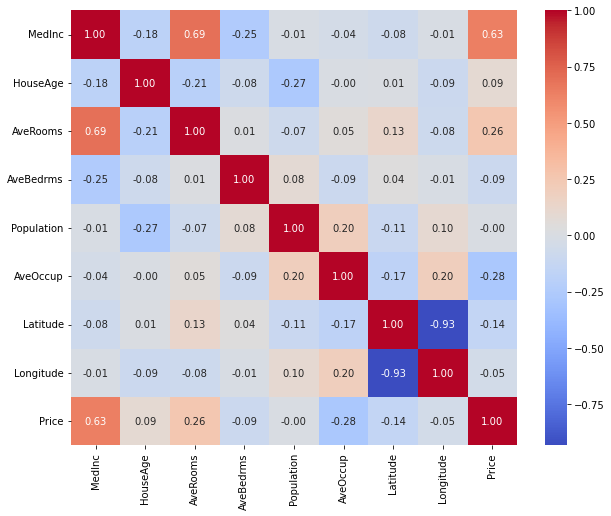

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title("")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


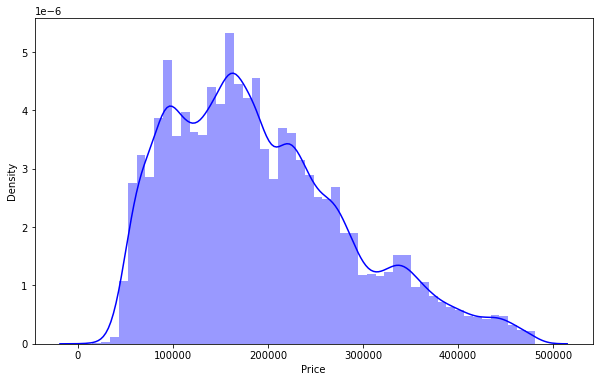

In [9]:
plt.figure(figsize=(10, 6))
sns.distplot(df["Price"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


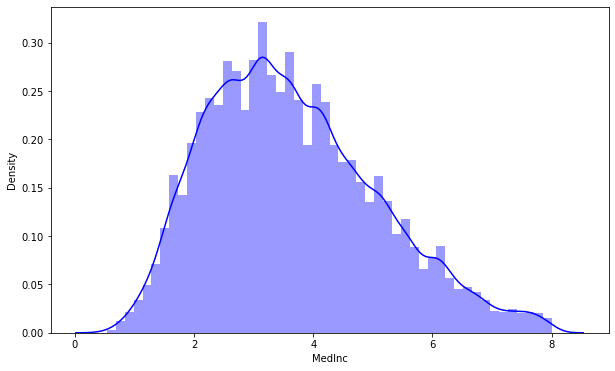

In [10]:
plt.figure(figsize=(10, 6))
sns.distplot(df["MedInc"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


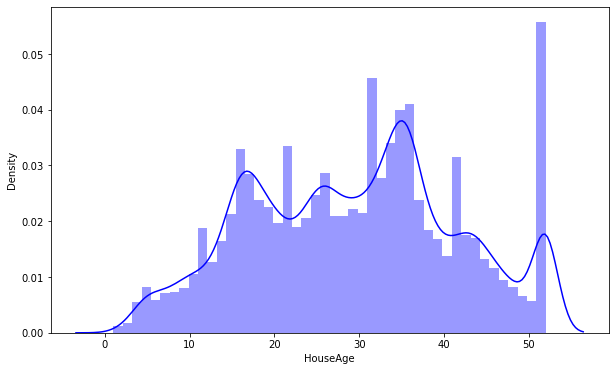

In [11]:
plt.figure(figsize=(10, 6))
sns.distplot(df["HouseAge"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


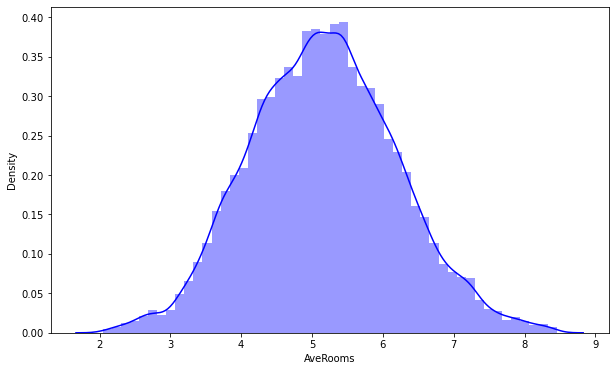

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(df["AveRooms"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


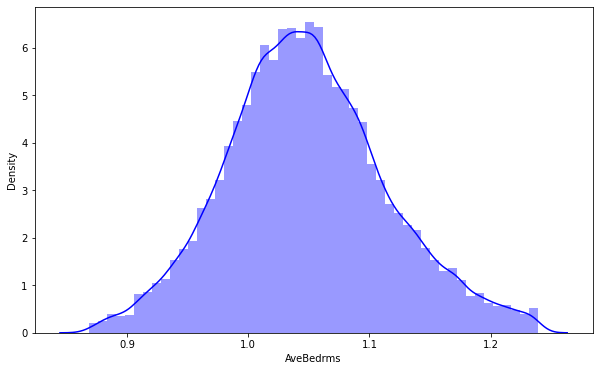

In [13]:
plt.figure(figsize=(10, 6))
sns.distplot(df["AveBedrms"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


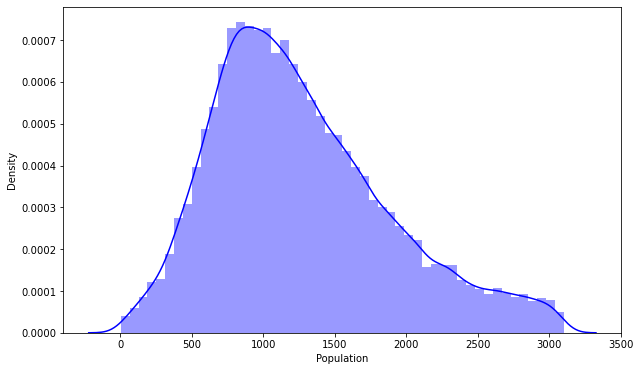

In [14]:
plt.figure(figsize=(10, 6))
sns.distplot(df["Population"],color='blue')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


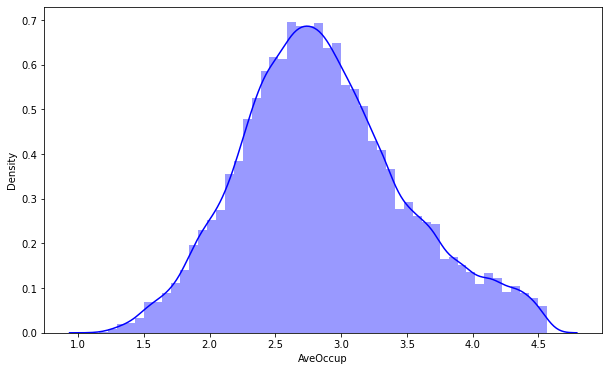

In [15]:
plt.figure(figsize=(10, 6))
sns.distplot(df["AveOccup"],color='blue')
plt.show()

In [16]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,2.5755,52.0,3.402576,1.058776,2619.0,2.108696,37.77,-122.42,325000.0
1,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96,283500.0
2,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38,222100.0
3,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96,229200.0
4,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,34.05,-117.94,163500.0


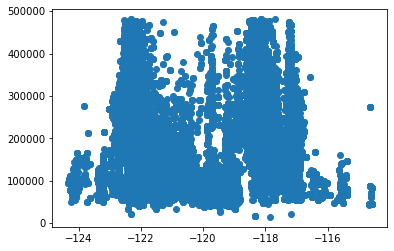

In [17]:
plt.scatter(df['Longitude'],df['Price'])

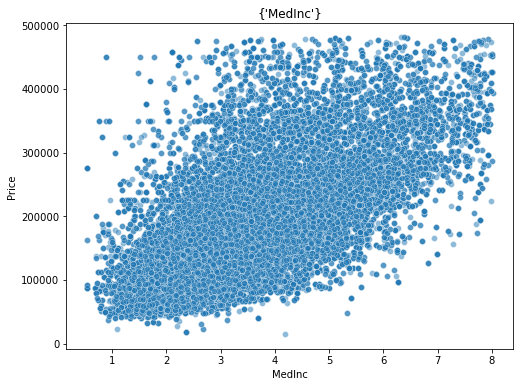

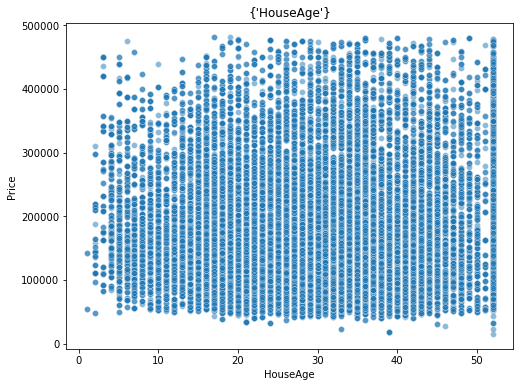

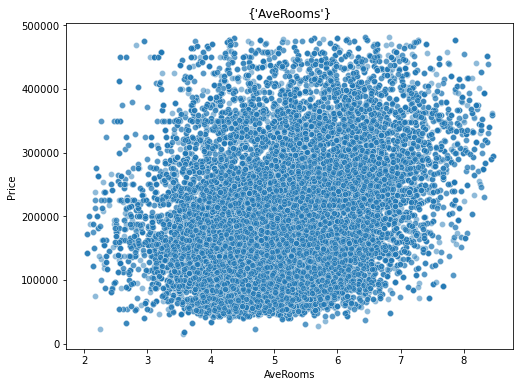

In [18]:
important_features = ["MedInc", "HouseAge", "AveRooms"]
for feature in important_features:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df["Price"], alpha=0.5)
    plt.title( {feature})
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.show()


<Figure size 864x432 with 0 Axes>

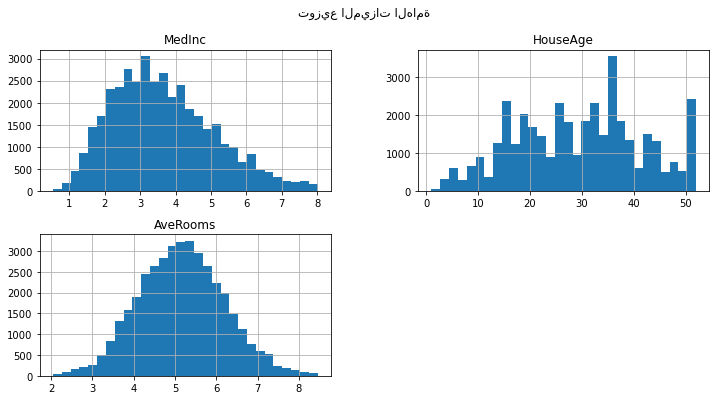

In [19]:
plt.figure(figsize=(12, 6))
df[important_features].hist(bins=30, figsize=(12, 6))
plt.suptitle("توزيع الميزات الهامة")
plt.show()

In [20]:
x = df.drop("Price",axis=1)
y = df["Price"]
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.5755,52.0,3.402576,1.058776,2619.0,2.108696,37.77,-122.42
1,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96
2,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
3,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
4,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,34.05,-117.94
...,...,...,...,...,...,...,...,...
39507,3.0469,20.0,5.656000,1.008000,337.0,2.696000,39.74,-122.16
39508,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
39509,4.0189,43.0,5.036511,1.111562,1212.0,2.458418,33.99,-118.43
39510,1.0801,28.0,3.229692,1.176471,1043.0,2.921569,37.62,-121.00


In [20]:
scaler = StandardScaler()

In [21]:
x_scaler=scaler.fit_transform(x)

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y, test_size=0.2, random_state=42)

In [23]:
param_grid = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.03],
    'max_depth': [6, 8],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]
}

In [24]:
xgb_model = XGBRegressor(random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid, scoring='r2', cv=3, verbose=1, n_jobs=-1)
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
            

In [25]:
best_model = grid_search.best_estimator_

In [26]:
y_pred = best_model.predict(x_test)

In [27]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 10177.727815485418
Mean Squared Error: 301810053.8777338
R^2 Score: 0.9656823419165069


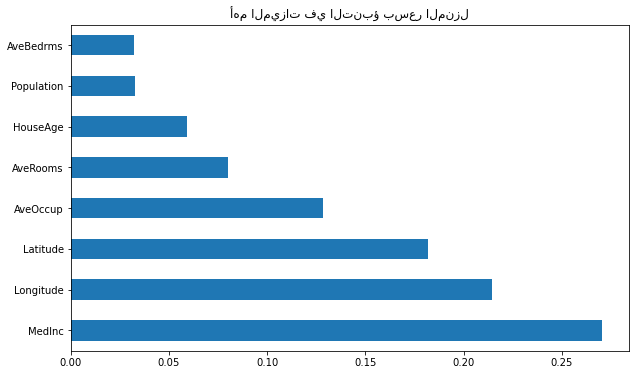

In [28]:
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(best_model.feature_importances_, index=x.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("أهم الميزات في التنبؤ بسعر المنزل")
plt.show()

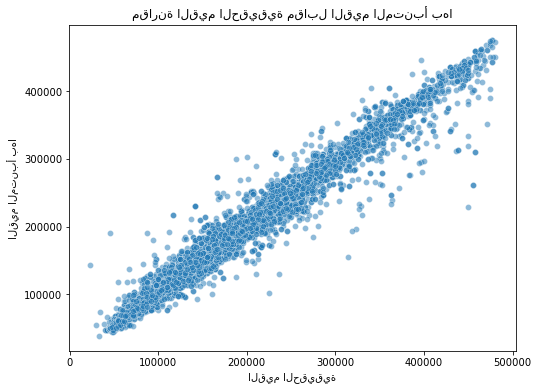

In [29]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("القيم الحقيقية")
plt.ylabel("القيم المتنبأ بها")
plt.title("مقارنة القيم الحقيقية مقابل القيم المتنبأ بها")
plt.show()


In [30]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.5755,52.0,3.402576,1.058776,2619.0,2.108696,37.77,-122.42
1,5.7192,15.0,6.395349,1.067979,1777.0,3.178891,37.58,-121.96
2,2.9344,36.0,3.986717,1.079696,1756.0,3.332068,34.03,-118.38
3,6.3700,35.0,6.129032,0.926267,658.0,3.032258,33.78,-117.96
4,3.7708,34.0,5.336420,1.000000,1341.0,4.138889,34.05,-117.94
...,...,...,...,...,...,...,...,...
39507,3.0469,20.0,5.656000,1.008000,337.0,2.696000,39.74,-122.16
39508,1.5284,31.0,2.740088,1.008811,597.0,2.629956,34.10,-118.32
39509,4.0189,43.0,5.036511,1.111562,1212.0,2.458418,33.99,-118.43
39510,1.0801,28.0,3.229692,1.176471,1043.0,2.921569,37.62,-121.00


In [31]:
with open("house_price_model.pkl", "wb") as file:
    pickle.dump(best_model, file)